# Import data yang dibutuhkan

In [1]:
%matplotlib inline
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Import CSV pada panda dataframe

In [2]:
cell_df = pd.read_csv(r'D:\perkuliahan\Semester 7\Bisnis Cerdas\Tugas 2\cell_samples.csv')

# Menampilkan 5 data pertama dalam dataframe

In [3]:
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Pendefinisian nilai dari variabel ax sebagai variabel yang menyimpan nilai dari pembuatan plot beserta persebaran plot (scatter plots) dengan sample malignant (nilai=4)

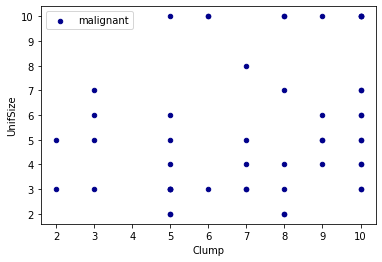

In [4]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');

Pengujian kesesuaian diagram

In [5]:
ax

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

In [6]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

In [7]:
ay

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

# Pendefinisian nilai dari variabel ay sebagai variabel yang menyimpan nilai dari pembuatan plot beserta persebaran plot (scatter plots) dengan sample benign (nilai=2)

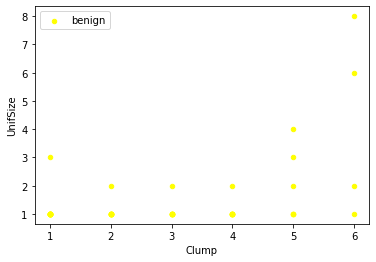

In [8]:
ay = cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign');

# Menunjukkan tipe data pada kolom

In [9]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

# Pengubahan tipe data dengan tujuan agar memiliki kesamaan (menjadi numerik)

In [10]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

# Pendefinisian array 5 baris yang berdasarkan pada data frame

In [11]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

# Penentuan target keluaran

In [12]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

# Pembentukan bagian training dan testing algoritma

In [13]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


# Import SVM & menentukan model transformasi

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='auto')


In [15]:
clf.fit(X_train, y_train)

SVC(gamma='auto')

# Memberikan hasil perhitungan prediksi

In [16]:
yhat = clf.predict(X_test)

In [17]:
yhat[0:5]

array([2, 4, 2, 4, 2])

# Evaluasi hasil model

In [18]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Import matriks evaluasi yaitu confusion matrix dan classification report

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


Pembuatan confusion matrix dengan perbandingan antara variabel yhat dengan y_test

In [20]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])

In [21]:
np.set_printoptions(precision=2)

# Keluaran classification_report

In [22]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [23]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Hasil Confusion Matrix

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


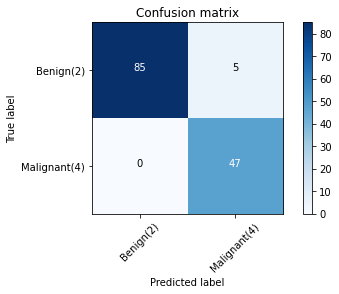

In [24]:
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

Hasil f1-score

In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

Hasil jacard score

In [26]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=4)

0.9038461538461539